In [46]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import mahotas as mh

In [66]:
def show(image, large=False):
    if large:
        fig, ax = plt.subplots(1, sharex=True, figsize=(8,8), dpi=100)
        ax.imshow(image, interpolation='nearest')
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(1, sharex=True)
        ax.imshow(image, interpolation='nearest')
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()


(330, 236, 3)
uint8


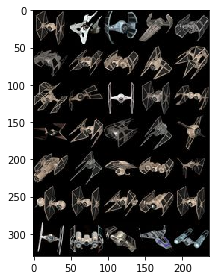

In [56]:
ships = cv2.imread('ships_types.png')
print(ships.shape)
print(ships.dtype)
# fig, ax = plt.subplots(1, sharex=True, figsize=(50,100))
show(ships)

In [16]:
236 / 5, 330 / 6

(47, 55)

In [49]:
# image = cv2.imread('a49b97_ship_map.jpg')
image = cv2.imread('df3ebd_ship_map.jpg')
print(image.shape)
print(image.dtype)

(800, 800, 3)
uint8


In [ ]:
ship = ships[0:55, 0:47]
shape = image.shape
deltas = []
for x in range(shape[0] - 55):
    for y in range(shape[1] - 47):
        diff = np.sum(np.abs(image[x:x + 55, y:y + 47] - ship)) / (55 * 47 * 3)
        print(x, y, diff)
        deltas.append(diff)
print(min(deltas))

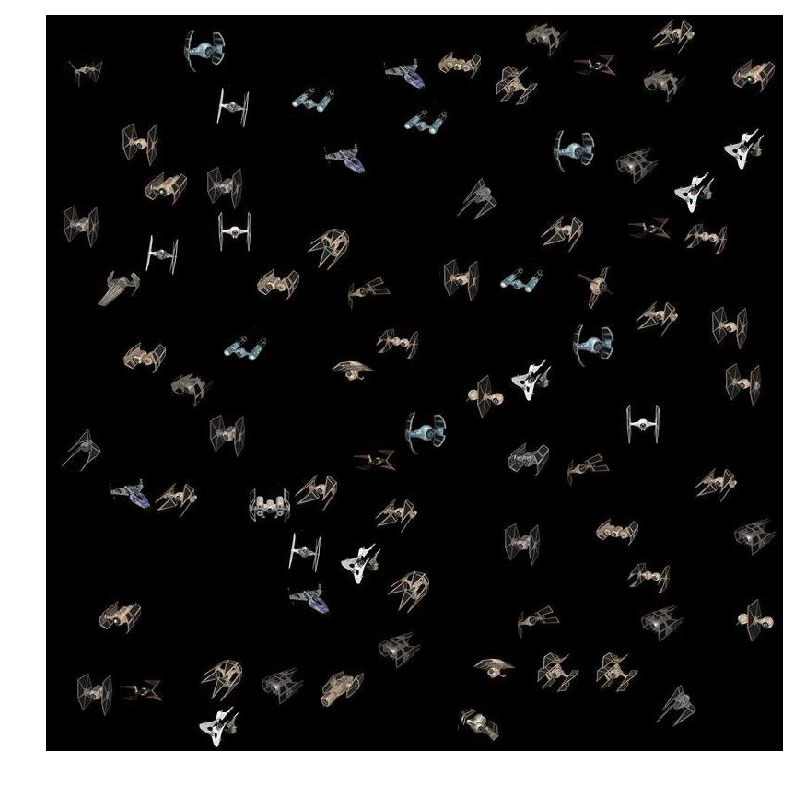

In [68]:
show(image, large=True)

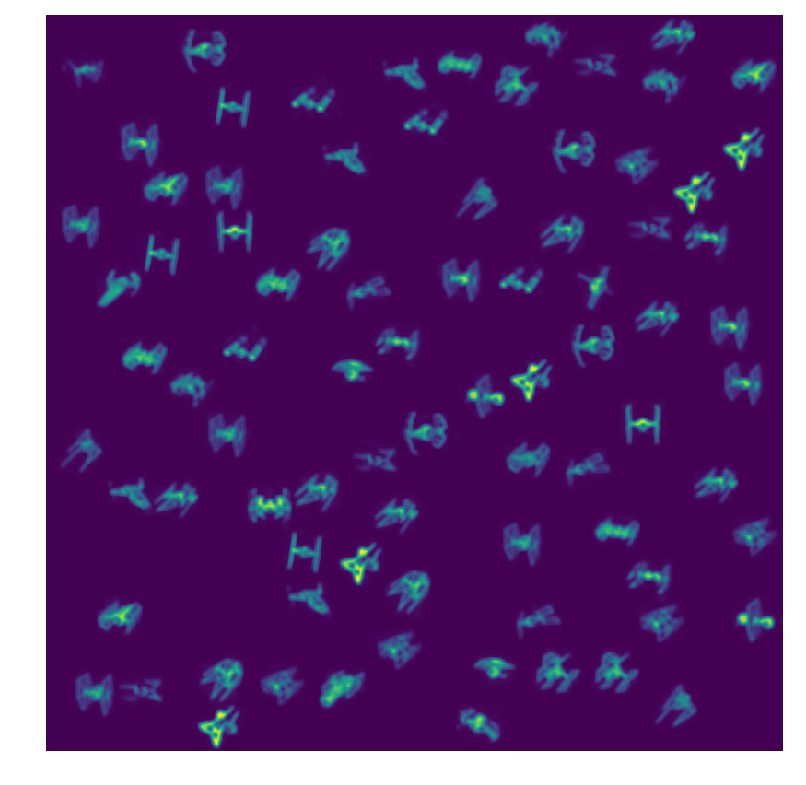

In [69]:
#image_d = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
kernel = np.ones((5,5),np.float32)/25
image_d = cv2.filter2D(image,-1,kernel)
#image_max = np.amax(image, axis=2)
image_max = image_d[:, :, 0]
show(image_max, large=True)

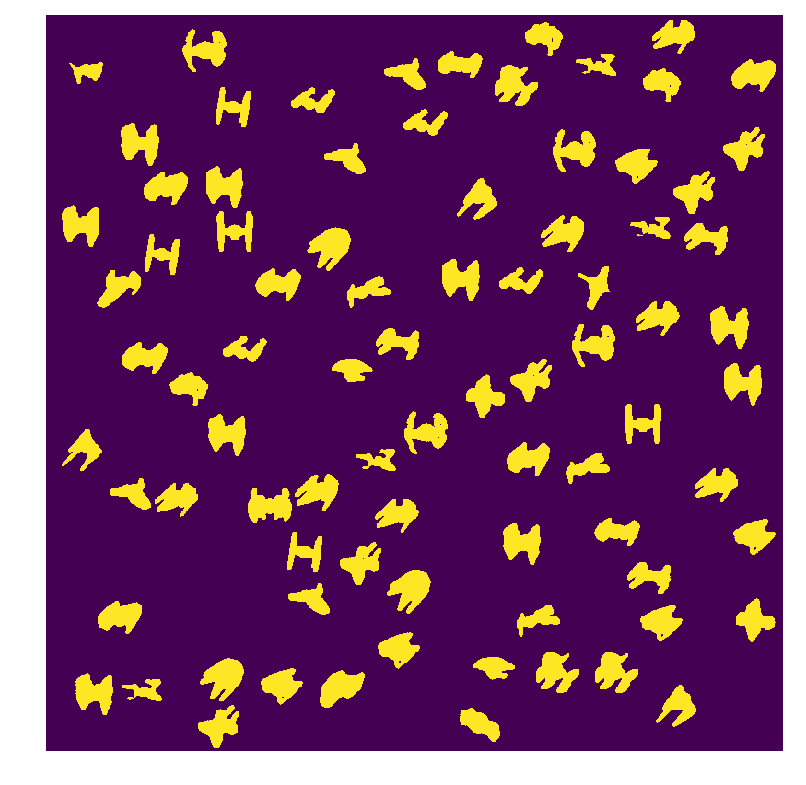

In [70]:
thresh = 20
image_thresh = image_max.copy()
image_thresh[image_thresh < thresh] = 0
image_thresh[image_thresh > thresh] = 255
show(image_thresh, large=True)

86


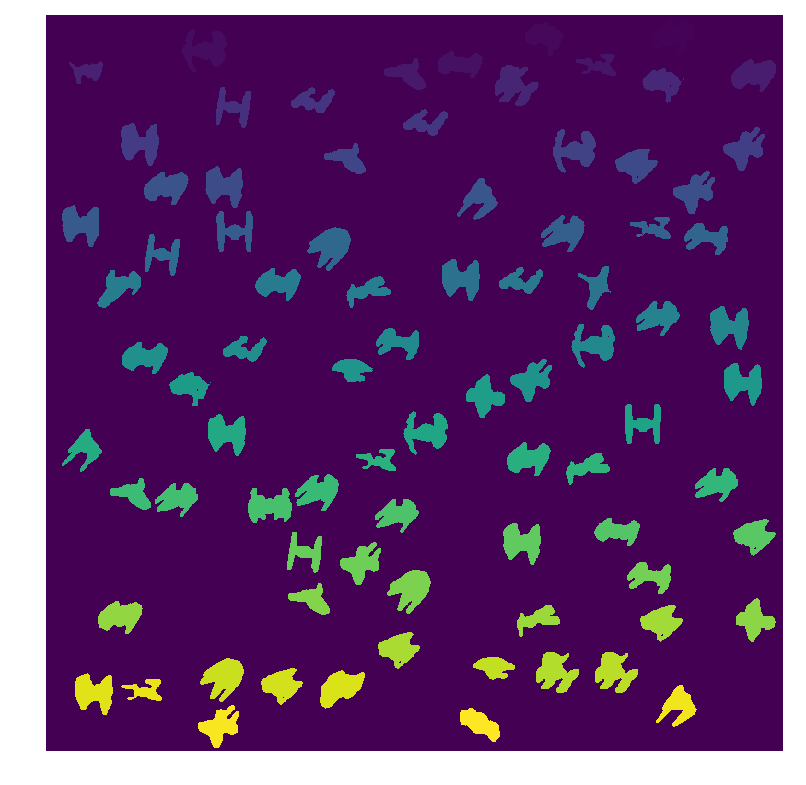

In [67]:
labeled, n_nucleus  = mh.label(image_thresh)
print(n_nucleus)
show(labeled, large=True)